In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from joblib import Parallel, delayed

In [2]:
# REPETITION FROM FIRST SECTION
def run_sim(x):
    truth = np.random.uniform(size=100) < x
    first_random = np.random.randint(2,size=100)
    second_random = np.random.randint(2,size=100)
    res = np.sum(first_random*truth + (1-first_random)*second_random)/100
    return res

In [3]:
# REPETITION FROM FIRST SECTION
def sample(x,data = 0.54):
    if run_sim(x) == data:
        return x

In [11]:
def propose(x):
    return np.random.randn() * 0.1 + x

In [1]:
def likehood(x):
    t = Parallel(n_jobs=-1)(delayed(sample)(x) for i in range(10000))
    t = np.array(t,dtype=float)
    return (1 - np.sum(np.isnan(t))/len(t))

In [20]:
def prior(x):
    return 1 #Flat prior

In [21]:
def posterior(x):    
    return likehood(x) * prior(x)

In [ ]:
x = 0.5
pi_x = posterior(x)

In [ ]:
trace = [x]
pi_trace = [pi_x]

In [23]:
for i in range(1000): #Main Loop
    
    x_cand = propose(x)
    
    pi_x_cand = posterior(x_cand)
    
    alpha = np.min([1,pi_x_cand/(pi_x + 0.00001)]) # Save division
    
    u = np.random.uniform() 
    
    (x, pi_x) = (x_cand,pi_x_cand) if u<alpha else (x,pi_x)
    trace.append(x)
    pi_trace.append(pi_x)
    
    if i % 10 == 0:
        print(f'Epoch {i}, X = {x:.2f}, pi = {pi_x:.2f}')

Epoch 0, X = 0.50, pi = 0.00
Epoch 10, X = 0.46, pi = 0.04
Epoch 20, X = 0.47, pi = 0.05
Epoch 30, X = 0.46, pi = 0.04
Epoch 40, X = 0.41, pi = 0.02
Epoch 50, X = 0.48, pi = 0.05
Epoch 60, X = 0.49, pi = 0.05
Epoch 70, X = 0.39, pi = 0.01
Epoch 80, X = 0.50, pi = 0.05
Epoch 90, X = 0.41, pi = 0.02
Epoch 100, X = 0.39, pi = 0.01
Epoch 110, X = 0.43, pi = 0.03
Epoch 120, X = 0.45, pi = 0.04
Epoch 130, X = 0.47, pi = 0.04
Epoch 140, X = 0.49, pi = 0.05
Epoch 150, X = 0.43, pi = 0.02
Epoch 160, X = 0.48, pi = 0.05
Epoch 170, X = 0.36, pi = 0.01
Epoch 180, X = 0.37, pi = 0.01
Epoch 190, X = 0.50, pi = 0.06
Epoch 200, X = 0.44, pi = 0.03
Epoch 210, X = 0.44, pi = 0.03
Epoch 220, X = 0.47, pi = 0.04
Epoch 230, X = 0.45, pi = 0.04
Epoch 240, X = 0.44, pi = 0.03
Epoch 250, X = 0.49, pi = 0.05
Epoch 260, X = 0.41, pi = 0.02
Epoch 270, X = 0.40, pi = 0.01
Epoch 280, X = 0.48, pi = 0.05
Epoch 290, X = 0.34, pi = 0.00
Epoch 300, X = 0.42, pi = 0.02
Epoch 310, X = 0.46, pi = 0.03
Epoch 320, X = 0.44

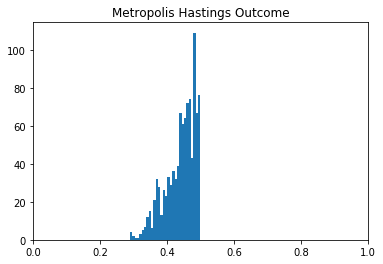

In [24]:
plt.hist(trace,bins=30)
plt.title('Metropolis Hastings Outcome')
plt.xlim(0,1);

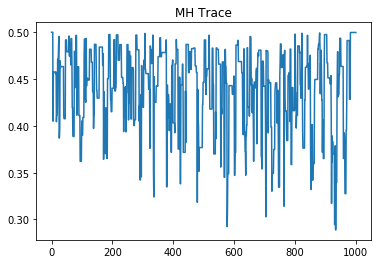

In [25]:
plt.plot(trace)
plt.title('MH Trace');

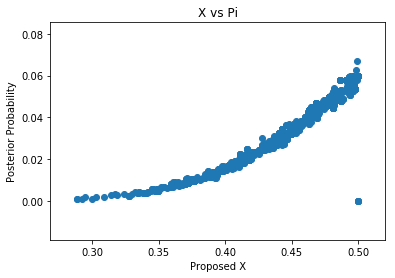

In [27]:
plt.scatter(x=trace,y=pi_trace)
plt.xlabel('Proposed X')
plt.ylabel('Posterior Probability')
plt.title('X vs Pi');